Data Preprocessing

Load the dataset
Clean the data (handle missing values, outliers)
Perform exploratory data analysis (EDA)

In [4]:
pip install numpy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade tensorflow


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.1
    Uninstalling numpy-2.0.1:
      Successfully uninstalled numpy-2.0.1


In [6]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [59]:
# import 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load the dataset
data = pd.read_csv("data.csv", encoding='latin-1')

# Display basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

In [61]:
# Handle missing values
data = data.dropna()

In [62]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [63]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the label encoder to the "country" column and transform it
data['country_encoded'] = label_encoder.fit_transform(data['Country'])

# Display the transformed column
print(data[['Country', 'country_encoded']].head())

# Drop the original "country" column if you no longer need it
data.drop('Country', axis=1, inplace=True)

          Country  country_encoded
0  United Kingdom               35
1  United Kingdom               35
2  United Kingdom               35
3  United Kingdom               35
4  United Kingdom               35


In [64]:
unique_countries = data['country_encoded'].unique()
print(unique_countries)

[35 13  0 23 14 24 10 32 30 25 26 18  3 21 19 16  6  9  7 31  1 17 12 15
 29 20 34 28  8  5 36  4 33 11  2 22 27]


In [65]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,country_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,35
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,35


In [66]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        406829 non-null  object 
 1   StockCode        406829 non-null  object 
 2   Description      406829 non-null  object 
 3   Quantity         406829 non-null  int64  
 4   InvoiceDate      406829 non-null  object 
 5   UnitPrice        406829 non-null  float64
 6   CustomerID       406829 non-null  float64
 7   country_encoded  406829 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 26.4+ MB
None


In [67]:
# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32'])

In [68]:
numeric_columns

,Quantity,UnitPrice,CustomerID,country_encoded
0,6,2.55,17850.0,35
1,6,3.39,17850.0,35
2,8,2.75,17850.0,35
3,6,3.39,17850.0,35
4,6,3.39,17850.0,35
...,...,...,...,...
541904,12,0.85,12680.0,13
541905,6,2.10,12680.0,13
541906,4,4.15,12680.0,13
541907,4,4.15,12680.0,13


Exploratory Data Analysis (EDA)

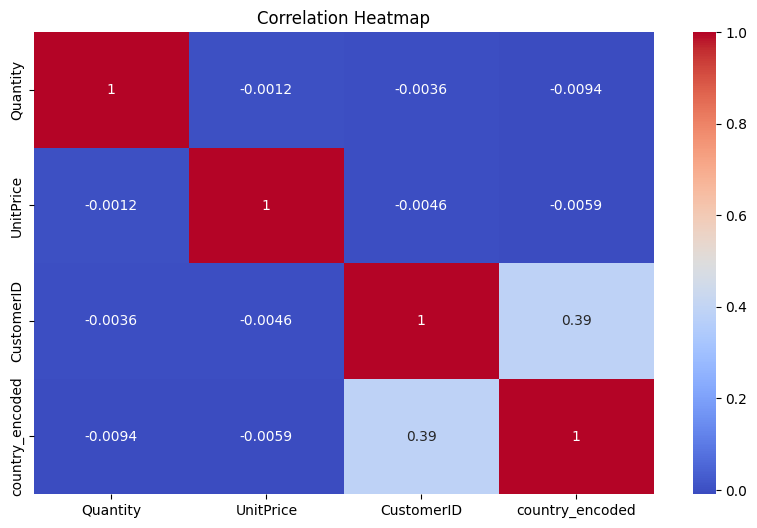

In [69]:
# Exploratory Data Analysis (EDA)
# EDA: Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Engineering and Selection

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assume the target variable is 'unitprice' for prediction
X = numeric_columns.drop(columns=['UnitPrice'])
y = numeric_columns['UnitPrice']

# Select the top 10 best features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support(indices=True)]
print("Selected Features:", selected_features)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=3. All the features will be returned.
  warnings.warn(


Selected Features: Index(['Quantity', 'CustomerID', 'country_encoded'], dtype='object')


Model Development and Validation

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")


Epoch 1/50


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8137/8137 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 4846.1338 - mae: 2.7236 - val_loss: 905.2573 - val_mae: 2.5677
Epoch 2/50
8137/8137 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 11863.0215 - mae: 2.9915 - val_loss: 904.5657 - val_mae: 2.5485
Epoch 3/50
8137/8137 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 2862.5950 - mae: 2.9668 - val_loss: 904.0552 - val_mae: 2.5196
Epoch 4/50
8137/8137 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 4615.6465 - mae: 2.6895 - val_loss: 903.1887 - val_mae: 2.7394
Epoch 5/50
8137/8137 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 12832.9102 - mae: 2.9645 - val_loss: 902.5981 - val_mae: 2.6979
Epoch 6/50
8137/8137 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 2863.4558 - mae: 2.7735 - val_loss: 902.1118 - val_mae: 2.3696
Epoch 7/50
8137/8137 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 1138.6876 - mae: 2.4563 - val_loss: 901.7017 - val_mae: 2.5616
Epoch 8/50
8137/8137 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 20313.4004 - mae: 3.1656 - val_loss: 901.3303 - val_mae: 2.4266


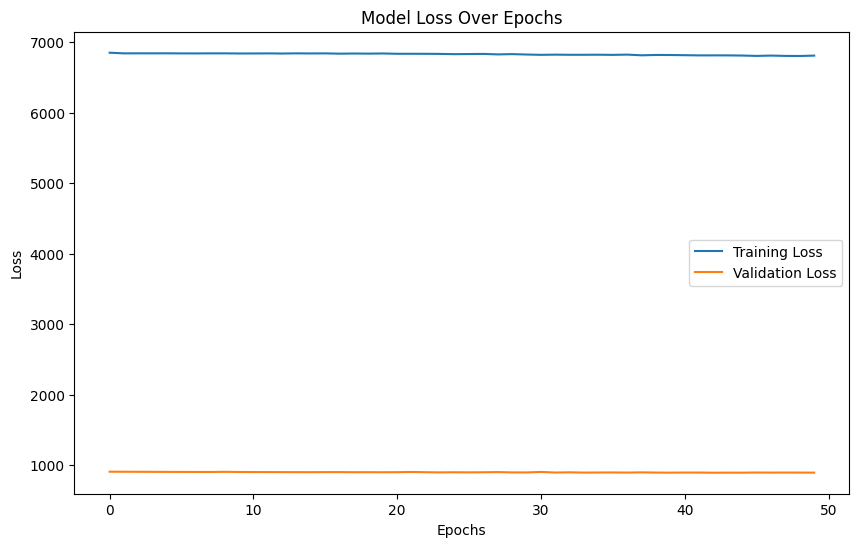

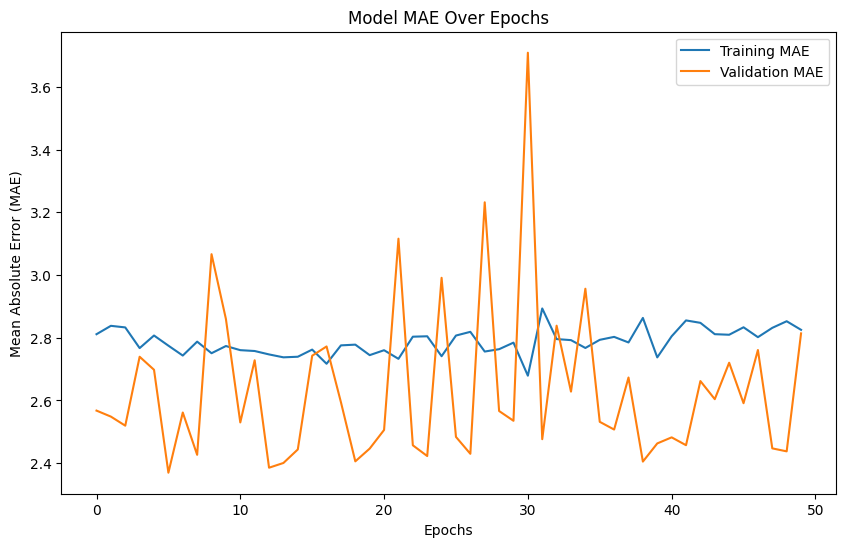

In [52]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()
